In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as  sb
%matplotlib inline
import pandas.api.types as  ptypes

In [103]:
# read csv file
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [104]:
train_data.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [105]:
train_data.describe()

,x,y
count,700.000000,699.000000
mean,54.985939,49.939869
std,134.681703,29.109217
min,0.000000,-3.839981
25%,25.000000,24.929968
50%,49.000000,48.973020
75%,75.000000,74.929911
max,3530.157369,108.871618


In [106]:
train_data.columns

Index(['x', 'y'], dtype='object')

In [107]:
train_data.dtypes

x    float64
y    float64
dtype: object

In [108]:
# checking null values in dataset
train_data.isnull().sum()

x    0
y    1
dtype: int64

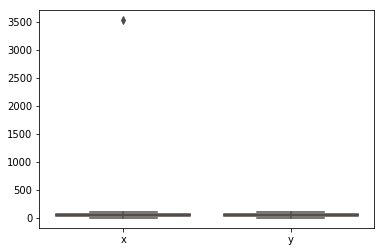

In [109]:
# boxplot to find the outliers  in train dataset
sb.boxplot(data=train_data, palette='autumn')

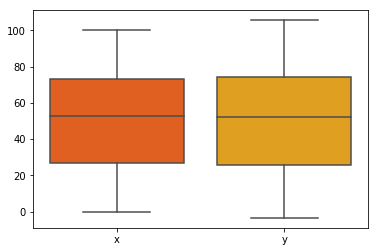

In [110]:
sb.boxplot(data=test_data, palette='autumn')

Skewness is 26.455845292909274
Mean is 21136.701501578937 , Median is  2401.0 
which shows that column data are skewed data
Right Skewed


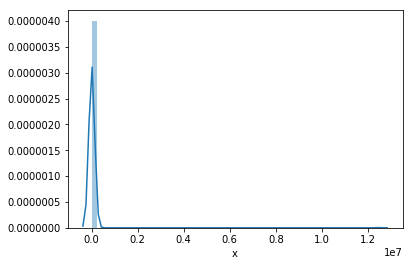

In [111]:
# feature variable
target = (np.square((train_data['x'])))
print ('Skewness is', target.skew())
print("Mean is",target.mean(), ", Median is ", target.median(), "\nwhich shows that column data are skewed data")
if target.mean()<target.median():
    print("Left Skewed")
elif target.mean()>target.median():
    print("Right Skewed")
else:
    print("perfect(No skeweness)")
sb.distplot(target)
train_data['x'] = target

<Figure size 432x288 with 0 Axes>

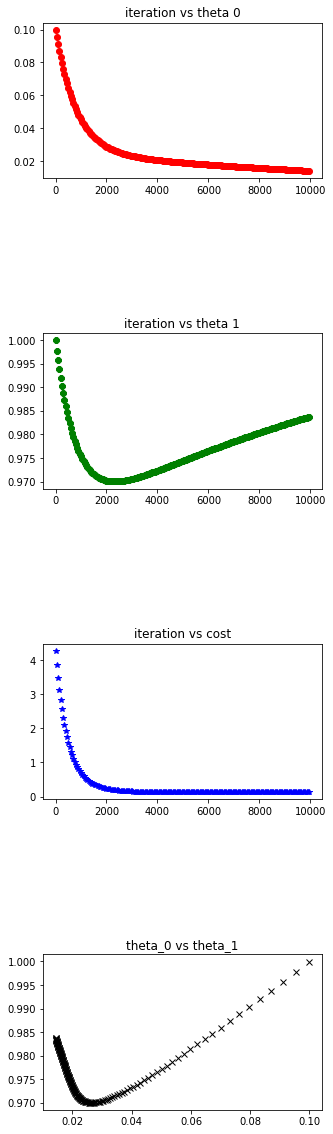

iteration = 9999 and cost function = 0.14507329438019975
0.014226569947130166 0.9838162927981788


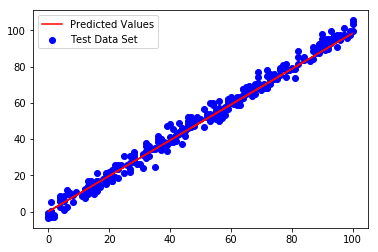

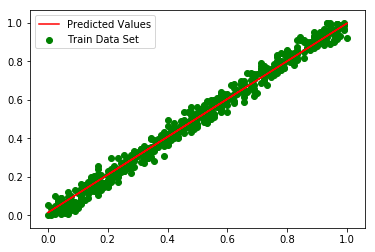

Accuracy: 86.00862449374681


In [155]:
# data preprocessing on given dataset
import pandas as pd
import numpy as np

# load dataset
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

class LinearRegression:
    
    def __init__(self):
        self.learning_rate = 0.001
        self.theta_0 = 0.1
        self.theat_1 = 1
        self.epoch = 10000
    
    
# #         handle missing data
    def handle_missing_data(self):
        train_data.replace(np.NaN,train_data.mean(),inplace=True)
        test_data.replace(np.NaN,test_data.mean(),inplace=True)
        return  train_data,test_data
    
#    check and remove outliers
    def remove_outlier(self,dataset):
        low = .05
        high = .95
        quant_dataset = dataset.quantile([low, high])
        for name in list(dataset.columns):
            if ptypes.is_numeric_dtype(dataset[name]):
                dataset = dataset[(dataset[name] > quant_dataset.loc[low, name]) & (dataset[name] < quant_dataset.loc[high, name])]
        return dataset

    
#   normalization of dataset
    def feature_scaling(self, dataset_train):
        for name in dataset_train.columns:
            dataset_train[name] = (dataset_train[name] - dataset_train[name].min()) / (dataset_train[name].max()-dataset_train[name].min())
        return dataset_train

#     gradient and descent
    def gradient_descent(self,x_data,y_data):
        h1 = h2 =0
        theta_0 = self.theta_0
        theta_1 = self.theat_1
        cost = 0
        h1 = 0.0
        h2 = 0.0
        cost_temp = 0.0
        fig = plt.figure()
        fig, (ax1, ax2, ax3,ax4) = plt.subplots(nrows=4, ncols=1, figsize=(5, 20))
        
#       iteration  to get  miminal cost
        for i in  range(self.epoch):
            cost = 0
            h1 = 0.0
            h2 = 0.0
            cost_temp = 0.0
            
#           calculating hypothesis and cost function 
            for data  in range(len(x_data)):
                hypo = theta_0 + (theta_1 * x_data[data])
                h1 += (hypo - y_data[data])
                h2 += ((hypo - y_data[data]) * x_data[data])
    
                cost += hypo - y_data[data]
    
#           getting minimum cost  function
            cost_temp +=(hypo - y_data[data]) ** 2 
            cost = (1/2 * len(x_data))* cost_temp
            theta_0 = theta_0 - ((self.learning_rate * h1) / len(x_data))
            theta_1 = theta_1 - ((self.learning_rate * h2) / len(x_data))
            
#           ploting graphs  on each 50 epochs 
            if(i%50 == 0):
               ax1.plot(i,theta_0,marker='o',color='r')
               ax1.set_title('iteration vs theta 0')
               ax2.plot(i,theta_1,marker='8',color='g')
               ax2.set_title('iteration vs theta 1')
               ax3.plot(i,cost,marker='*',color='b')
               ax3.set_title('iteration vs cost')
               ax4.plot(theta_0,theta_1,marker = 'x', color='black')
               ax4.set_title('theta_0 vs theta_1')
            if(cost<=0.00009): 
                break

        plt.subplots_adjust(hspace=1)
        plt.show()
        print("iteration = {} and cost function = {}".format(i, cost))
        return theta_0,theta_1
    
#   perform testing dataset
    def test(self, x_test_data, theta_0, theta_1):
        y_predict = [0]*len(x_test_data)
        for i in range(len(x_test_data)):
              y_predict[i] = (theta_0 + (theta_1*x_test_data[i]))
        return y_predict

#     calculating accuracy over  tested dataset
    def accuracy(self, y_test_data, y_predicted):
        diff = 0
        for i in range(len(y_test_data)):
            diff += abs((y_predicted[i] - y_test_data[i])/y_test_data[i])
        diff  =  (diff/len(y_test_data))
        data_accuracy = 1 - diff
        return data_accuracy*100       
    
    

def main():
    obj =LinearRegression()
    
#     handle missing values to get data clean
    train_data, test_data = obj.handle_missing_data()
#     removing outliers from train data
    train_data = obj.remove_outlier(train_data)
#     feature scaling on train data
    train_data = obj.feature_scaling(train_data)

#     converting dataset into  array
    x_train_data = np.array(train_data["x"])
    y_train_data = np.array(train_data["y"])
    
    x_test_data = np.array(test_data["x"])
    y_test_data = np.array(test_data["y"])
    
#     calculate gradient descent on train data for test
    theta_0, theta_1= obj.gradient_descent(x_train_data,y_train_data)
    print(theta_0,theta_1)
    
#     test data over train data 
    y_prediction_test =obj.test(x_test_data,theta_0,theta_1)
    y_prediction_train = obj.test(x_train_data,theta_0,theta_1)
    
#     get accuracy of predicted value to original value
    accuracy = obj.accuracy(y_test_data,y_prediction_test)
   
    
#     plotting test data set over prediction value
    plt.scatter(x_test_data, y_test_data, color='b', label='Test Data Set')
    plt.plot(x_test_data, y_prediction_test, color='r', label='Predicted Values')
    plt.legend()
    plt.show()

#     plotting train data set over  prediction value
    plt.scatter(x_train_data, y_train_data, color='g', label='Train Data Set')
    plt.plot(x_train_data, y_prediction_train, color='r', label='Predicted Values')
    plt.legend()
    plt.show()
    
#     display accuracy
    print("Accuracy:",accuracy)

if __name__ == '__main__':
    main()